In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from database
from sqlalchemy import create_engine

In [ ]:
# Database connection
user = 'root'
password = '123'
host = '127.0.0.1'
port = 3306
database = 'project_db'

In [4]:
# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

In [6]:
# Load combined data from SQL database
query = """
SELECT region, month, price, 'Regular' AS fuel_type FROM regular_gas_prices_canada
UNION ALL
SELECT region, month, price, 'Premium' AS fuel_type FROM premium_gas_prices_canada
UNION ALL
SELECT region, month, price, 'Diesel' AS fuel_type FROM diesel_prices_canada;
"""
df_combined = pd.read_sql(query, engine)

In [7]:
# Data Cleaning (Optional if already cleaned)
df_combined.dropna(subset=["price"], inplace=True)  # Remove rows with missing price

In [ ]:
# Calculate average price by region and fuel type
region_avg_prices = (
    df_combined.groupby(["region", "fuel_type"])["price"]
    .mean()
    .reset_index()
    .rename(columns={"price": "avg_price"})
)

<Axes: xlabel='region', ylabel='avg_price'>

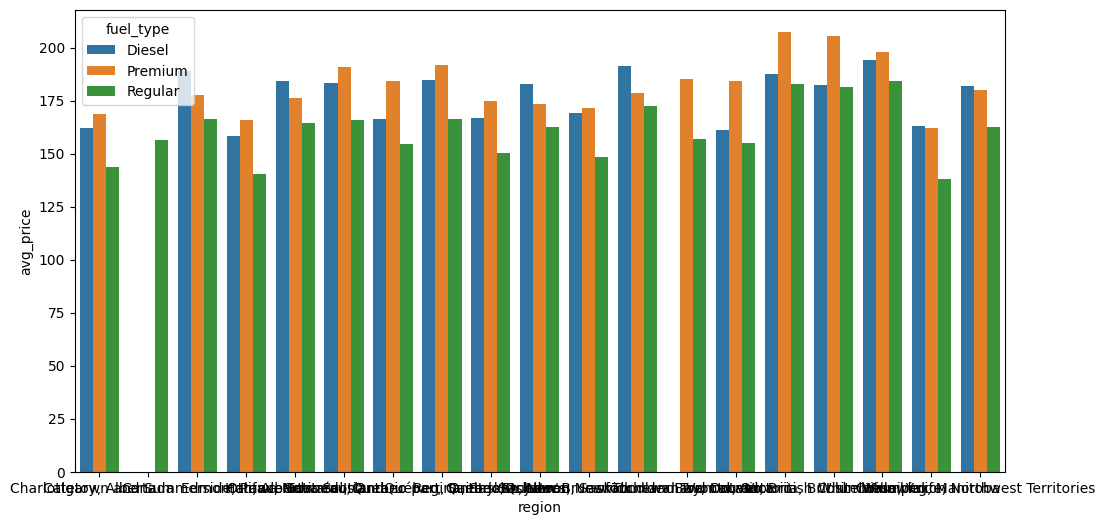

In [9]:
# Visualize average prices by region and fuel type
plt.figure(figsize=(12, 6))
sns.barplot(
    data=region_avg_prices,
    x="region",
    y="avg_price",
    hue="fuel_type"
)

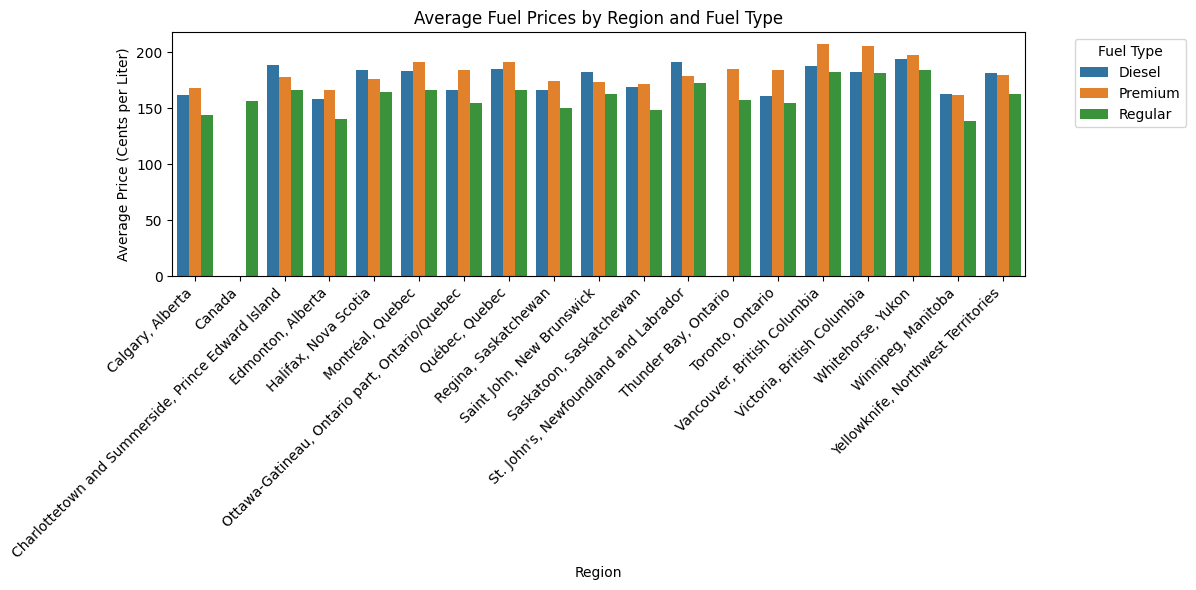

In [17]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=region_avg_prices, x='region', y='avg_price', hue='fuel_type')

# Rotate and align the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("Average Fuel Prices by Region and Fuel Type")
plt.ylabel("Average Price (Cents per Liter)")
plt.xlabel("Region")

# Move the legend to the top right corner outside the plot
plt.legend(title="Fuel Type", loc='upper left', bbox_to_anchor=(1.05, 1))

# Automatically adjust the layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()